In [1]:
#!pip install plotly
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [2]:
# import library

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [4]:
# Load Dataset

df = pd.read_csv('homicide_by_countries.csv')

In [5]:
df.head(5)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [6]:
df.shape

(195, 6)

In [7]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool

In [9]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [10]:
df['Rate'] = df['Rate'].astype(int)

In [34]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [35]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int64
Count         int64
Year          int64
dtype: object

In [36]:
df1 = df.sort_values('Count', ascending = False)

In [37]:
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
112,Monaco,Europe,Western Europe,0,0,2015
84,Isle of Man,Europe,Northern Europe,0,0,2016
151,San Marino,Europe,Southern Europe,0,0,2011


In [38]:
df1 = df1[['Location', 'Count']].head(5)

In [39]:
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


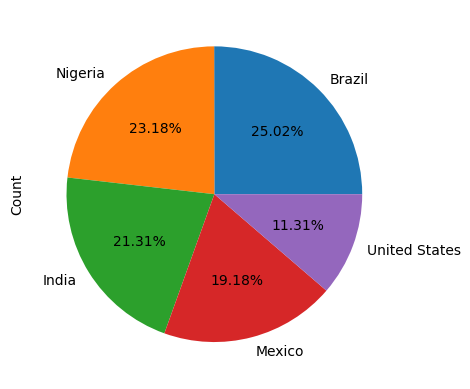

In [40]:
df1.plot(x = 'Location', y = 'Count', kind = 'pie', labels = df1.Location, autopct = '%1.2f%%')
plt.legend().set_visible(False)

In [42]:
# Group by Region

df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)

In [43]:
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

In [44]:
df['Region'].replace('Americas', 'N/S America', inplace = True)

In [45]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [46]:
df2

Region
Americas    153597
Asia        105552
Africa       99481
Europe       19869
Oceania        347
Name: Count, dtype: int64

In [47]:
# Group by Region

df2 = df.groupby('Region')['Count'].sum().sort_values(ascending = False)

In [48]:
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

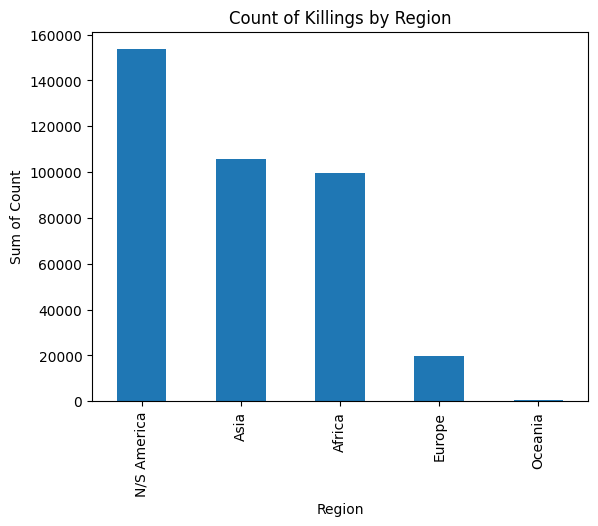

In [52]:
df2.plot(kind = 'bar')
plt.title('Count of Killings by Region')
plt.ylabel('Sum of Count')
plt.show()

In [53]:
# Group by Subregion

df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending = False)

In [54]:
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [55]:
df3.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [56]:
df3.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

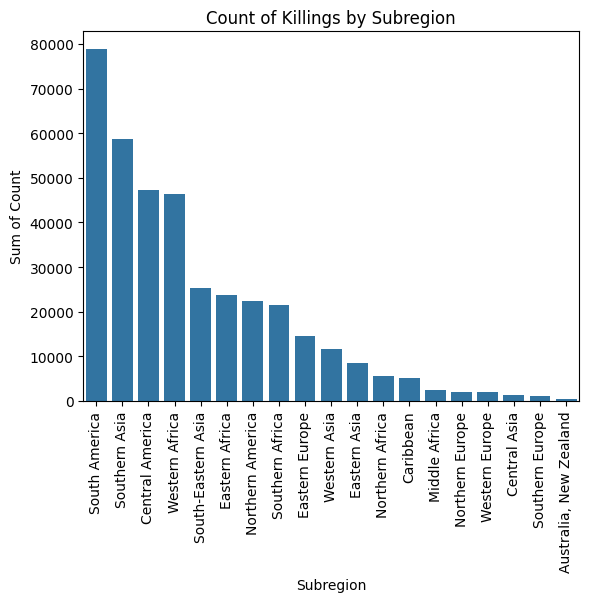

In [59]:
sns.barplot(x = df3.index, y = df3.values)
plt.xticks(rotation = 'vertical')
plt.title('Count of Killings by Subregion')
plt.ylabel('Sum of Count')
plt.show()

In [60]:
# Extract N/S America and Asia

df4 = df[(df['Region'] == 'N/S America') | (df['Region'] == 'Asia')]

In [61]:
df4

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
5,Anguilla,N/S America,Caribbean,28,4,2014
6,Antigua and Barbuda,N/S America,Caribbean,9,9,2020
7,Argentina,N/S America,South America,5,2416,2020
8,Armenia,Asia,Western Asia,1,52,2020
...,...,...,...,...,...,...
188,Uruguay,N/S America,South America,9,337,2020
189,Uzbekistan,Asia,Central Asia,1,396,2019
190,Venezuela,N/S America,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011


In [62]:
df4.Year

0      2018
5      2014
6      2020
7      2020
8      2020
       ... 
188    2020
189    2019
190    2018
191    2011
192    2013
Name: Year, Length: 102, dtype: int64

In [63]:
df4 = df4[df4['Year'] > 2016][['Region', 'Year', 'Count']]

In [64]:
df4

,Region,Year,Count
0,Asia,2018,2474
6,N/S America,2020,9
7,N/S America,2020,2416
8,Asia,2020,52
12,Asia,2020,230
...,...,...,...
183,Asia,2019,64
186,N/S America,2020,21570
188,N/S America,2020,337
189,Asia,2019,396


In [65]:
df4.Year

0      2018
6      2020
7      2020
8      2020
12     2020
       ... 
183    2019
186    2020
188    2020
189    2019
190    2018
Name: Year, Length: 74, dtype: int64

In [66]:
# Group by Region and Sum of Count

df4 = df4.groupby(['Region', 'Year']).sum()['Count']

In [67]:
df4

Region       Year
Asia         2017      1787
             2018     16923
             2019      6458
             2020     53516
             2021     15299
N/S America  2018     13793
             2019      4276
             2020    134784
Name: Count, dtype: int64

In [70]:
# Convert df4 to dataframe

new_df4 = df4.unstack(level = 0)

In [71]:
new_df4

Region,Asia,N/S America
Year,,
2017,1787.0,NaN
2018,16923.0,13793.0
2019,6458.0,4276.0
2020,53516.0,134784.0
2021,15299.0,NaN


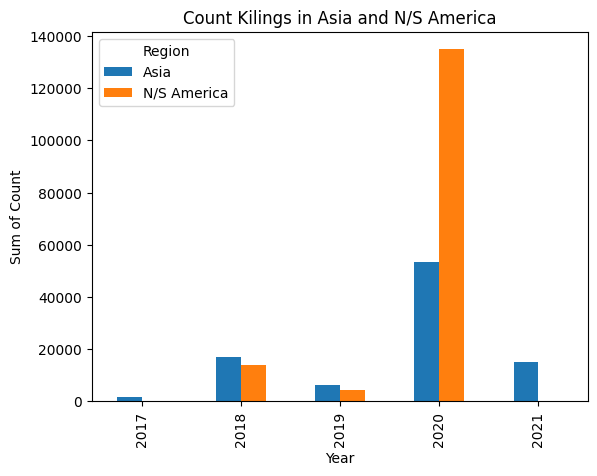

In [73]:
new_df4.plot(kind = 'bar')
plt.title('Count Kilings in Asia and N/S America')
plt.ylabel('Sum of Count')
plt.show()

In [74]:
df5 = df[['Year', 'Region', 'Count']]
df5 = df5.groupby(['Year', 'Region']).sum().sort_values(by = 'Year', ascending = False)

In [75]:
df5

Count
Year Region             
2021 Asia          15299
2020 Oceania         221
     N/S America  134784
     Asia          53516
     Africa        28460
     Europe        15066
2019 Europe          249
     Asia           6458
     Africa        44210
     N/S America    4276
     Oceania         126
2018 Asia          16923
     Europe          883
     N/S America   13793
2017 Asia           1787
     Africa         1467
     Europe         3670
2016 N/S America     608
     Asia            627
     Europe            0
     Africa         4987
2015 Asia            241
     Africa         2206
     Europe            0
2014 Asia           3029
     N/S America      13
2013 Asia           5782
2012 Africa        15264
     Asia             61
     N/S America      53
2011 Africa          855
     Asia           1626
     Europe            0
2010 Africa          303
     Europe            1
2009 Africa           27
     N/S America      42
2008 Africa         1702
2007 N/S America      26
2006 N/S America       2
     Asia            203

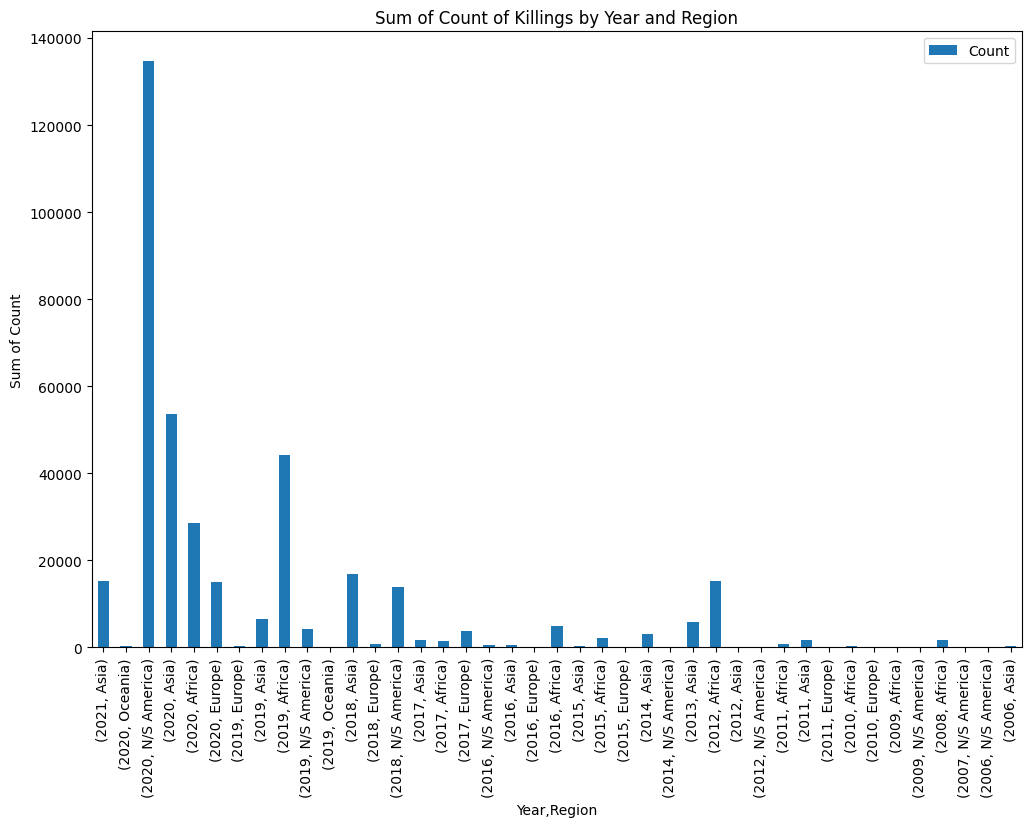

In [78]:
df5.plot(kind = 'bar', figsize = (12, 8))
plt.title('Sum of Count of Killings by Year and Region')
plt.ylabel('Sum of Count')
plt.show()

In [81]:
# Average Count for Each Subregion
df6 = df.groupby('Subregion')['Count'].mean().sort_values(ascending = False).round(2)

In [82]:
df6

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [83]:
df6.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [84]:
df6.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [85]:
data = {
    'Category': df6.index,
    'Value': df6.values
}

In [86]:
data

{'Category': Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
        'Southern Africa', 'Western Africa', 'South-Eastern Asia',
        'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
        'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
        'Caribbean', 'Australia, New Zealand', 'Northern Europe',
        'Southern Europe'],
       dtype='object', name='Subregion'),
 'Value': array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
        1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
         230.56,  201.48,  173.5 ,  139.8 ,   64.29])}

In [87]:
type(data)

dict

In [88]:
# Convert Dictionary to DataFrame

new_df6 = pd.DataFrame(data)

In [89]:
new_df6

,Category,Value
0,Southern Asia,6514.56
1,South America,6067.08
2,Central America,5921.38
3,Northern America,4463.40
4,Southern Africa,4295.80
5,Western Africa,4210.73
6,South-Eastern Asia,2531.40
7,Eastern Africa,1577.93
8,Eastern Europe,1460.40
9,Eastern Asia,1223.29


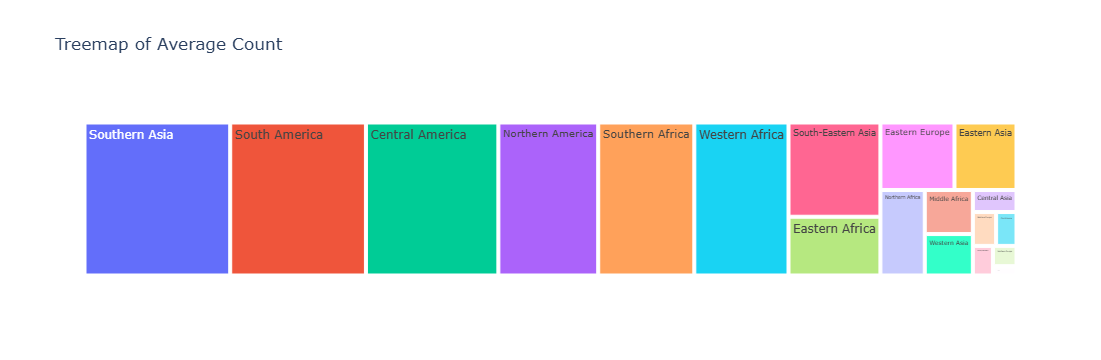

In [94]:
fig = px.treemap(new_df6, path = ['Category'], values = 'Value', title = 'Treemap of Average Count')
fig.update_traces(hovertemplate = 'Category: %{label} <br> Value: %{value}')